# 4.2 - Más modelos USL

In [1]:
import pylab as plt
%matplotlib inline

from sklearn.datasets import make_moons

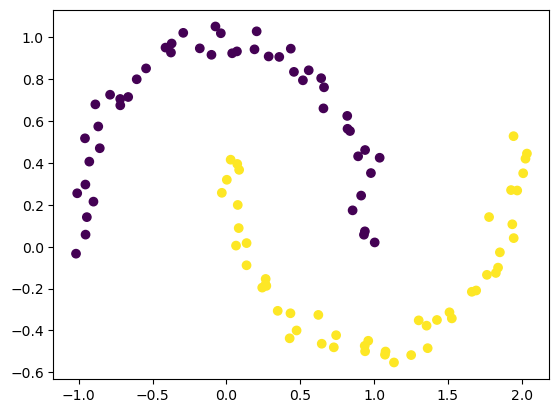

In [2]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)

plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=moons[1]);     # color

# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![dbscan](images/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad


https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
dbscan = DBSCAN()

dbscan.fit(moons[0])

DBSCAN()

In [11]:
#help(DBSCAN)

In [8]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

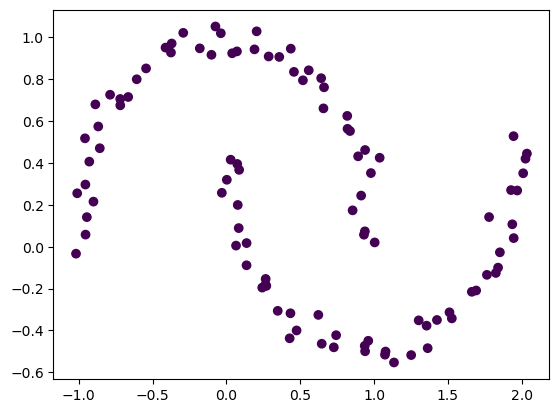

In [9]:
plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=dbscan.labels_);     # color

In [13]:
dbscan = DBSCAN(eps=0.3, min_samples=3)

dbscan.fit(moons[0])

DBSCAN(eps=0.3, min_samples=3)

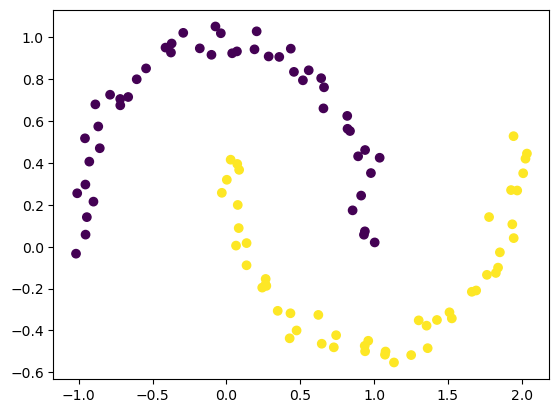

In [14]:
plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=dbscan.labels_);     # color

In [15]:
dbscan.labels_

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [16]:
#%pip install hdbscan

In [17]:
from hdbscan import HDBSCAN

In [18]:
hscan = HDBSCAN(gen_min_span_tree=True)

In [19]:
hscan.fit(moons[0])

HDBSCAN(gen_min_span_tree=True)

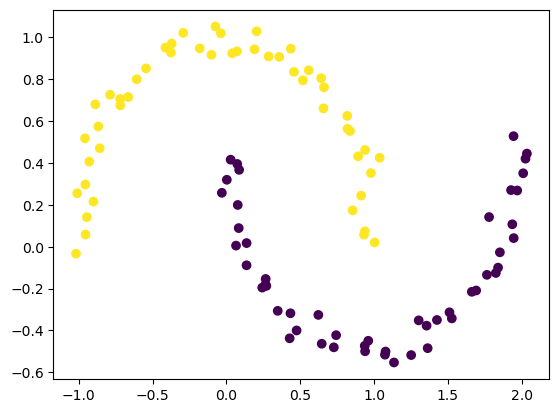

In [20]:
plt.scatter(moons[0][:,0],   # x
    moons[0][:,1],   # y
    c=hscan.labels_);     # color

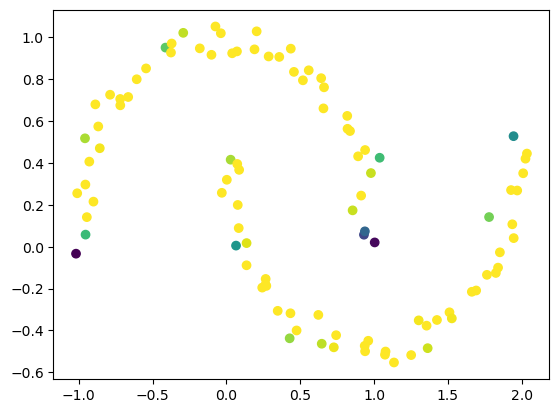

In [21]:
plt.scatter(moons[0][:,0],   # x
    moons[0][:,1],   # y
    c=hscan.probabilities_);     # color

In [25]:
list(zip(hscan.probabilities_, hscan.labels_))[:10]

[(0.8832851748208932, 1),
 (1.0, 0),
 (1.0, 1),
 (1.0, 1),
 (0.8081034643750964, 0),
 (1.0, 1),
 (1.0, 1),
 (1.0, 0),
 (0.9689641807230824, 1),
 (0.993945550292061, 1)]

In [27]:
hscan.probabilities_.min()

0.6253066499960598

In [29]:
import pandas as pd

df=pd.DataFrame(moons[0])

df['label']=hscan.labels_

df['prob']=hscan.probabilities_

df[df.prob<0.7]

,0,1,label,prob
71,-1.018234,-0.033211,1,0.625307
97,1.004272,0.020495,1,0.632785


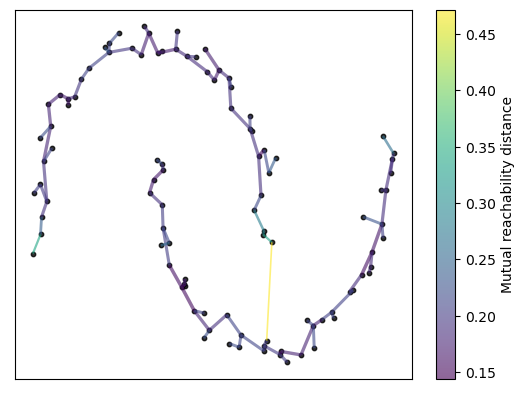

In [31]:
hscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha=0.6,
                                    node_size=10,
                                    edge_linewidth=1.2);

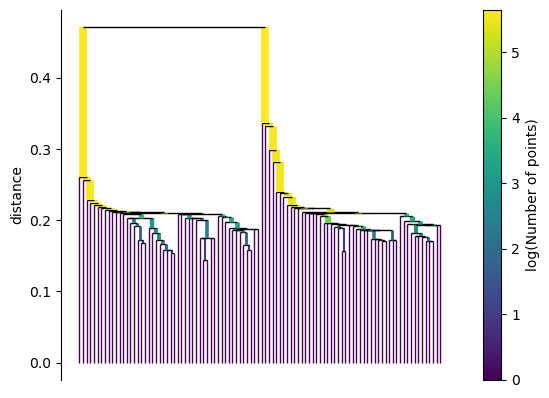

In [33]:
hscan.single_linkage_tree_.plot(cmap='viridis',
                                  colorbar=True);

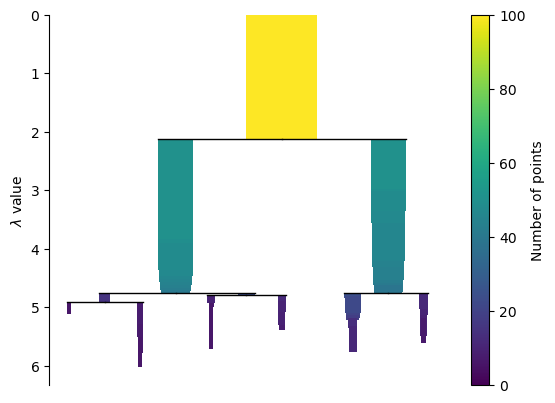

In [35]:
hscan.condensed_tree_.plot();

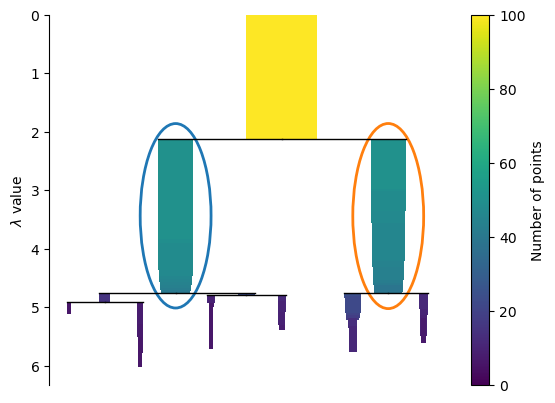

In [36]:
import seaborn as sns

hscan.condensed_tree_.plot(select_clusters=True,
                             selection_palette=sns.color_palette());

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![optics](images/optics.png)

In [38]:
from sklearn.cluster import OPTICS

In [39]:
opt = OPTICS(max_eps=1, eps=0.5, min_samples=5)

opt.fit(moons[0])

OPTICS(eps=0.5, max_eps=1)

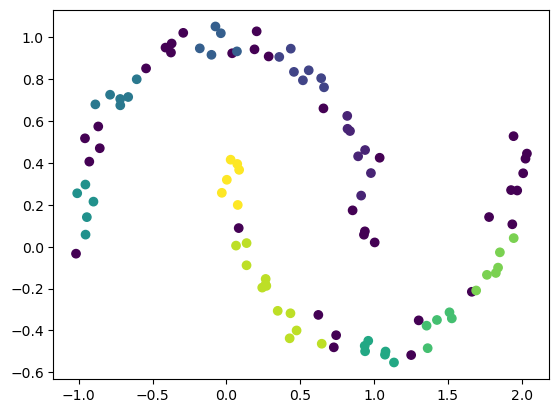

In [41]:
plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=opt.labels_);     # color

In [42]:
opt.labels_

array([-1, -1, -1, -1, -1,  0,  3,  7, -1, -1,  0,  1,  9,  8,  3,  1,  1,
       -1, -1,  5,  6,  3,  9,  4, -1, -1, -1, -1,  0, -1,  5, -1, -1, -1,
        4,  8,  4,  8,  2,  8,  5, -1, -1,  1,  6,  1,  5,  8,  0,  8,  4,
        6, -1, -1,  3,  1, -1,  2, -1,  6,  2,  0,  8,  7,  3,  9,  9,  3,
        4, -1, -1, -1,  5,  9,  1,  0,  9, -1,  7,  7,  8, -1,  8, -1,  2,
        7,  7, -1,  5, -1,  0,  2, -1,  8,  8, -1,  8, -1, -1,  6])

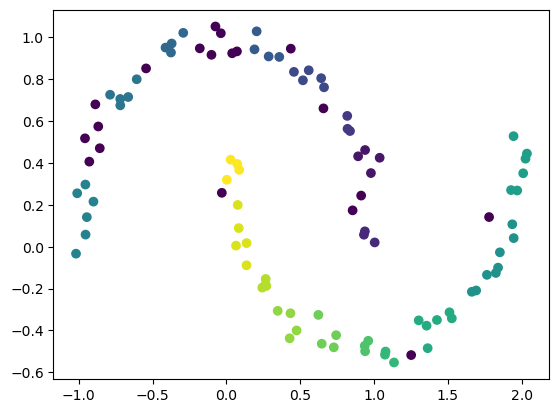

In [43]:
opt = OPTICS(max_eps=0.3, eps=0.2, min_samples=3)

opt.fit(moons[0])

plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=opt.labels_);     # color

In [44]:
opt.labels_

array([ 0,  8, -1,  4,  9,  2,  6,  8, -1, -1,  0, -1, 17, 16,  6,  4,  3,
        9,  5, 12, 10,  6, 16,  7, 10, -1, -1, 16,  2,  9, 11, 13, -1,  1,
        7, 13,  7, 14, -1, 14, 11,  9,  8,  3, 10,  3, 12, 15,  2, 14,  7,
       10,  5,  4,  6,  3,  5, -1, -1, 10, -1,  0, 15,  8,  6, 17, 17, -1,
        7, 13,  9,  7, 12, -1,  3, -1, 17, -1,  8,  8, 14,  9, 15,  5, -1,
        8,  8,  1, 11,  4,  0, -1, -1, 16, 16, -1, 15,  1, 13, 10])

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![gmm](images/gmm.png)


![gmm2](images/gmm2.png)

In [45]:
from sklearn.mixture import GaussianMixture as GM

In [46]:
gm = GM(n_components=2, covariance_type='full')


gm.fit(moons[0])


gm.means_

array([[-0.18199293,  0.64722176],
       [ 1.10015703, -0.09368477]])

In [47]:
gm.covariances_

array([[[0.34079029, 0.06248888],
        [0.06248888, 0.09225541]],

       [[0.37089529, 0.05150294],
        [0.05150294, 0.10898331]]])

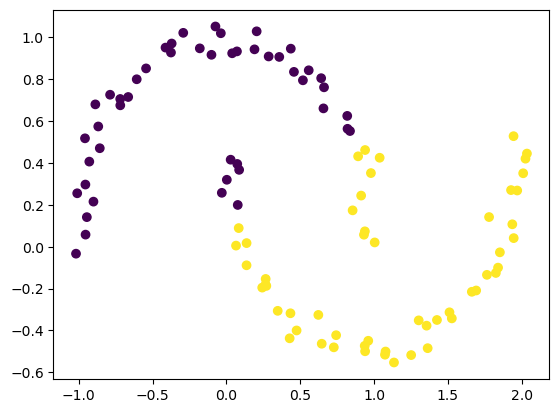

In [48]:
plt.scatter(moons[0][:,0],   # x
            moons[0][:,1],   # y
            c=gm.predict(moons[0]));     # color

In [49]:
gm.predict(moons[0])

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1])

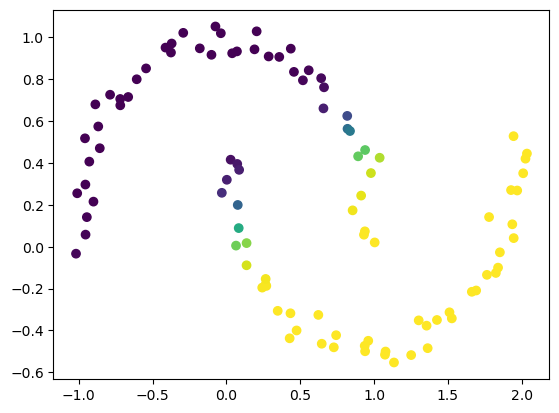

In [50]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=gm.predict_proba(moons[0])[:, 1]);

In [58]:
from sklearn.datasets import make_classification as mc

In [59]:
X = mc(n_features=2,
       n_redundant=0,
       n_informative=2,
       n_clusters_per_class=1)

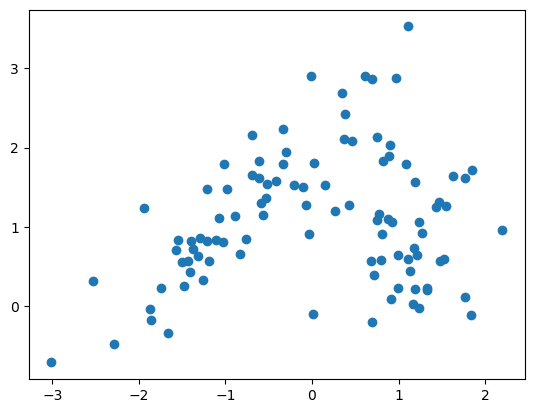

In [60]:
plt.scatter(X[0][:, 0], X[0][:, 1]);

In [61]:
gm = GM(n_components=2, covariance_type='full')


gm.fit(X[0])


gm.means_

array([[ 1.06678385,  0.89734486],
       [-0.82679406,  1.24376807]])

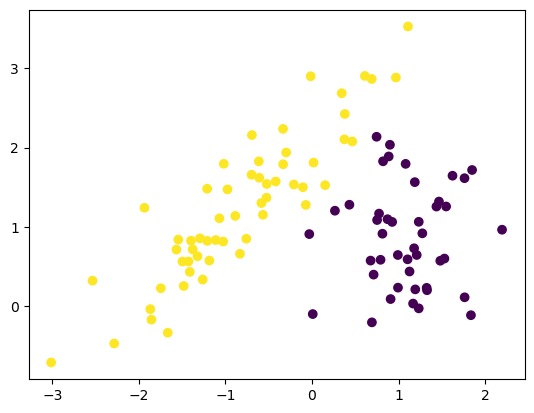

In [62]:
plt.scatter(X[0][:, 0], 
            X[0][:, 1],
            c=gm.predict(X[0]));

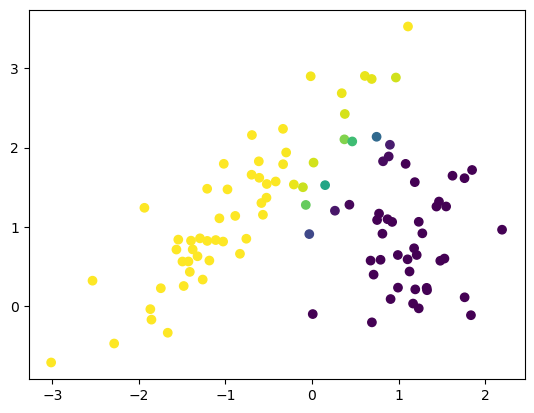

In [63]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict_proba(X[0])[:, 1]);

In [66]:
list(zip(gm.predict_proba(X[0])[:, 1], gm.predict(X[0])))[:10]

[(0.999999566647644, 1),
 (0.9999999709124263, 1),
 (0.9940630652246847, 1),
 (0.8123741684478312, 1),
 (0.9983107717179811, 1),
 (3.988208099223649e-10, 0),
 (7.023839342570052e-05, 0),
 (7.386201969212084e-08, 0),
 (0.9999118759434592, 1),
 (1.7451266548073627e-07, 0)]

![](data/usl_models.png)

![usl_models](images/usl_models.png)